In [5]:
!pip install pandas-datareader


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 581.8 kB/s eta 0:00:001m550.6 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01


In [7]:
!pip install pykalman

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 KB 759.5 kB/s eta 0:00:000:00:010:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48461 sha256=6053b31fce7ff6f9112d7039cb7557e6e0ffb7c48d7fcf55f6b9743aa0b4ed02
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman


In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from pandas_datareader import data as web

from sklearn.decomposition import PCA
import seaborn as sns
from datetime import datetime as dt, timedelta as td
from pykalman import KalmanFilter
sns.set()

In [9]:
end = dt.today()
start = end - td(days=5000)
df = web.get_data_stooq('goog', start=start, end=end)[['Close']]
df

,Close
Date,
2023-06-02,125.2300
2023-06-01,124.3700
2023-05-31,123.3700
2023-05-30,124.6400
2023-05-26,125.4300
...,...
2014-04-02,28.3500
2014-04-01,28.3580
2014-03-31,27.8485


In [10]:
kf = KalmanFilter(
    transition_matrices = [1],
    observation_matrices = [1],
    initial_state_mean = 0,
    initial_state_covariance = 1,
    observation_covariance=1,
    transition_covariance=0.01
)

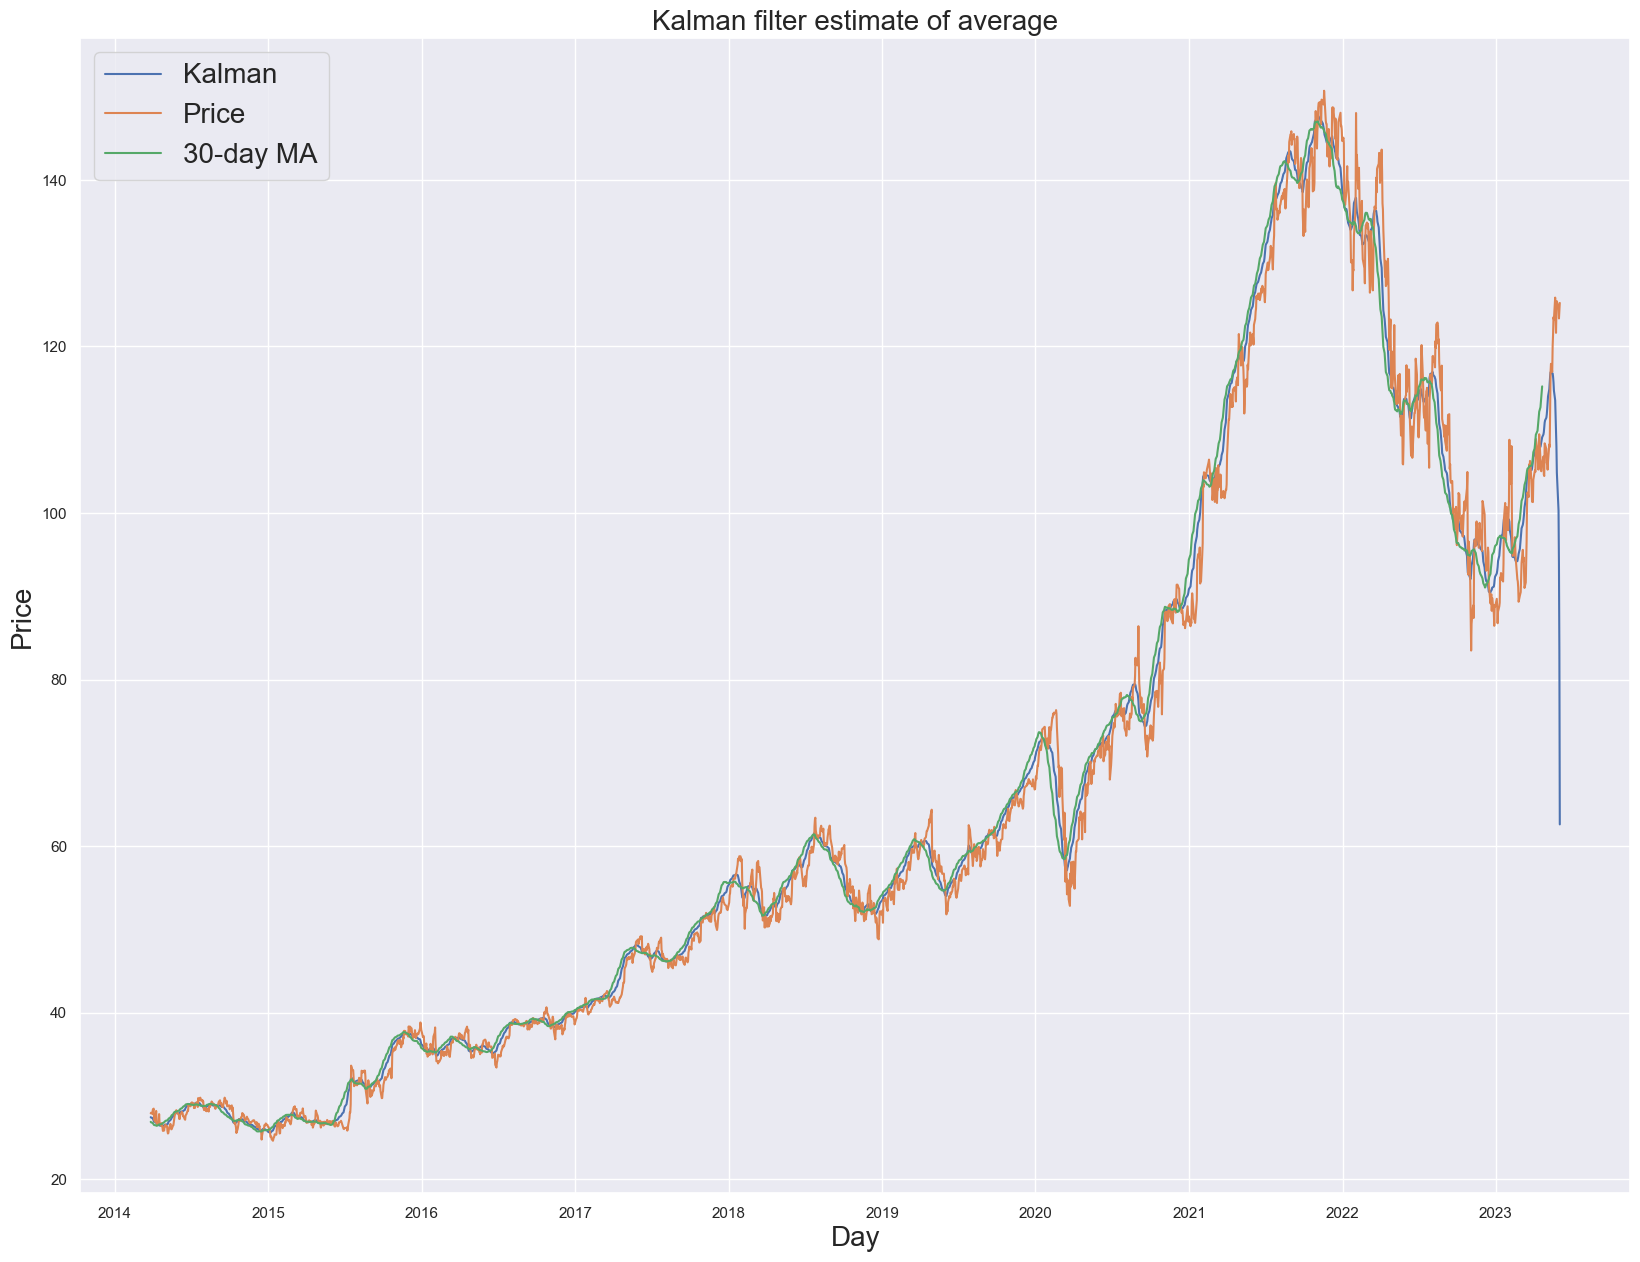

In [11]:
state_means, _ = kf.filter(df.values)
state_means = pd.Series(state_means.flatten(), index=df.index)

mean30 = df.rolling(window=30).mean()

plt.figure(figsize=(20,15))
plt.plot(state_means)
plt.plot(df)
plt.plot(mean30)
plt.title('Kalman filter estimate of average', fontsize=20)
plt.legend(['Kalman', 'Price', '30-day MA'], fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Price', fontsize=20);

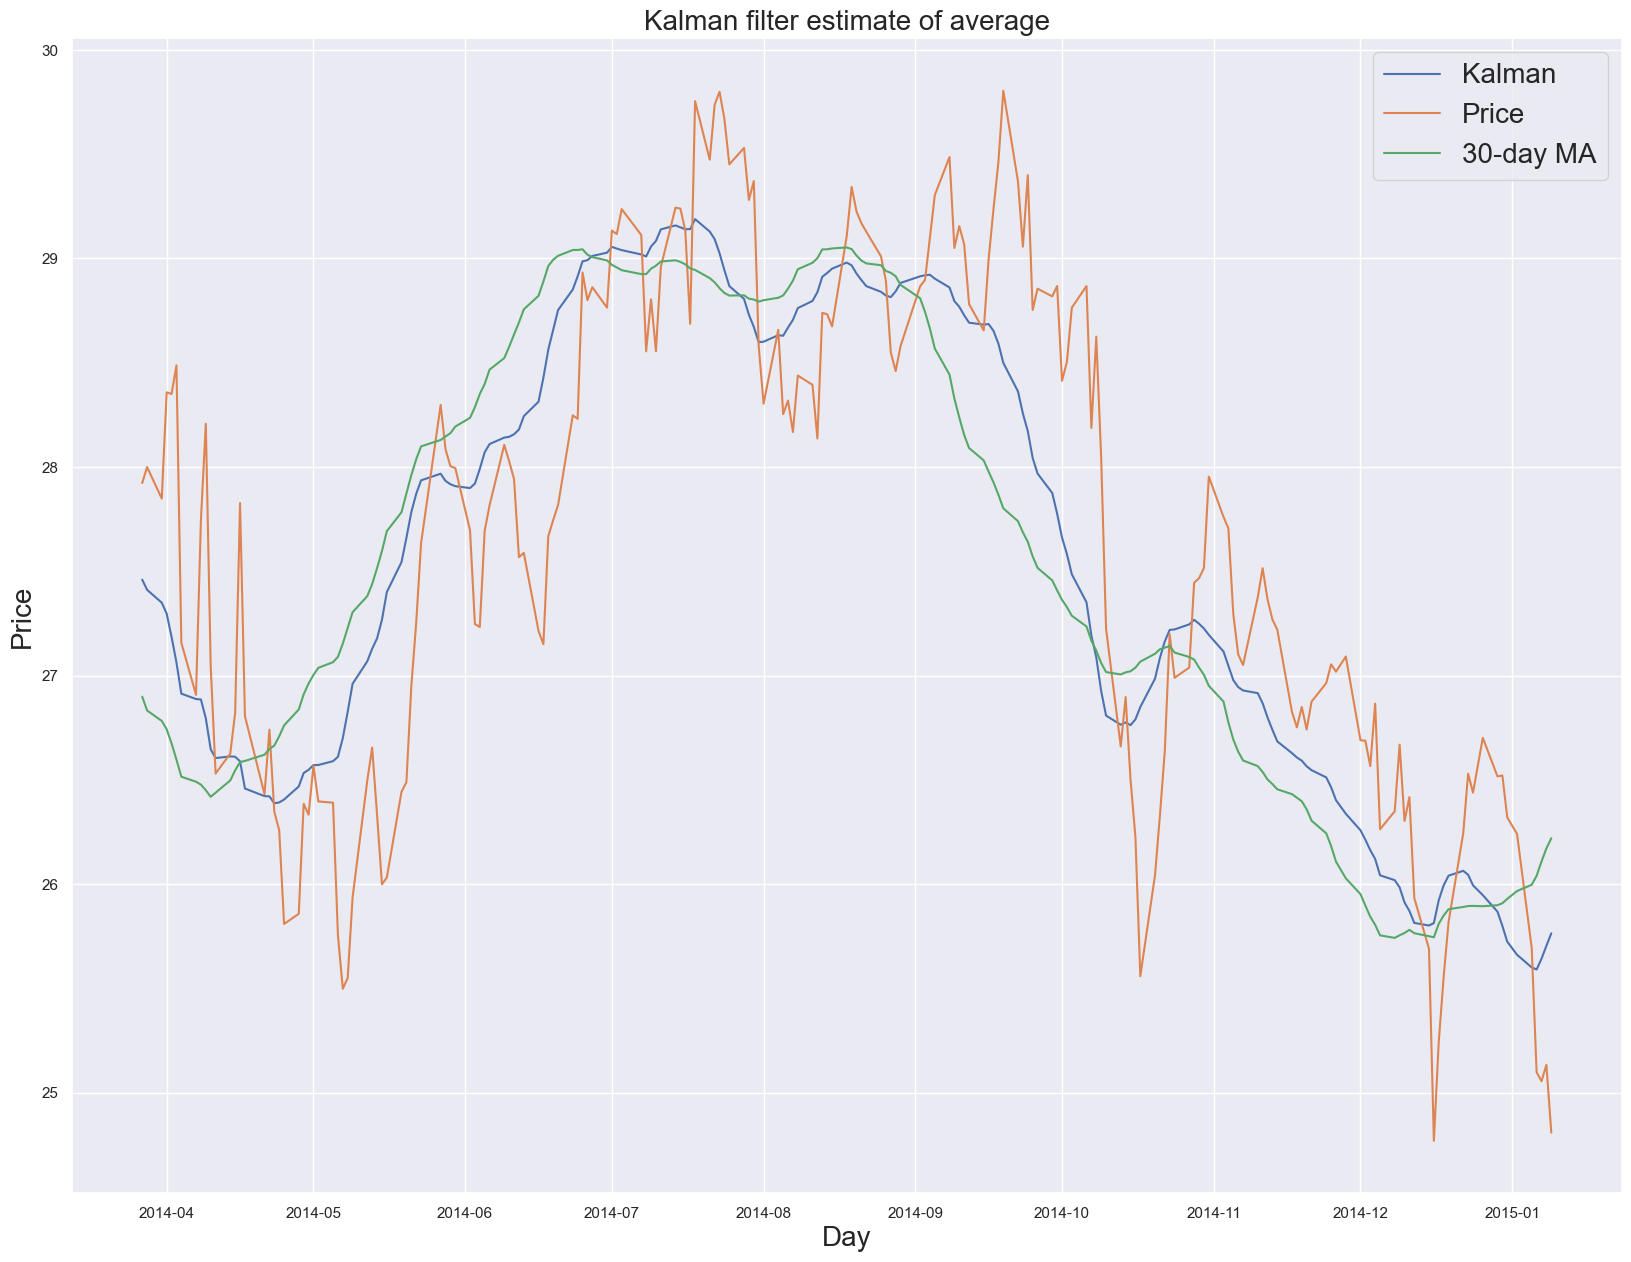

In [12]:


plt.figure(figsize=(20,15))
plt.plot(state_means[-200:])
plt.plot(df[-200:])
plt.plot(mean30[-200:])
plt.title('Kalman filter estimate of average', fontsize=20)
plt.legend(['Kalman', 'Price', '30-day MA'], fontsize=20)
plt.xlabel('Day', fontsize=20)
plt.ylabel('Price', fontsize=20);

